# Modul: Míry rozptylení

## Cíl lekce
- Pochopit, co znamená **rozptyl** a proč nestačí jen průměr.
- Umět rozlišit **populační** vs. **výběrový** rozptyl a směrodatnou odchylku.
- Vysvětlit a spočítat **rozpětí**, **IQR**, **MAD** (medián absolutních odchylek).
- Naučit se, kdy použít **robustní** míry (IQR, MAD) místo citlivých (rozptyl, sm.odch.).

## Teorie: pojmy
- **Datová sada**: konečná množina číselných hodnot. Jednotlivá čísla jsou **pozorování**.
- **Počet pozorování**: $n$.
- **Průměr**: $\bar{x}$ (středová hodnota, citlivá na extrémy).
- **Odchylka**: $(x_i-\bar{x})$ – jak moc se i-té pozorování liší od průměru.
- **Kvadratická odchylka**: $(x_i-\bar{x})^2$ – odchylka na druhou (záporné i kladné odchylky se „nevyruší“).

## Teorie: vzorce a vysvětlení symbolů
### Populační rozptyl (pro výuku jednodušší)
$$
\sigma^{2} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2
$$
**Symboly:** $\sigma^2$ – rozptyl; $n$ – počet pozorování; $\sum_{i=1}^{n}$ – součet od $i=1$ do $i=n$; $x_i$ – i-tá hodnota; $(x_i-\bar{x})$ – odchylka; $(\cdot)^2$ – umocnění na druhou.

### Výběrový rozptyl (nestranný odhad)
$$
s^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2
$$
**Poznámka:** ve jmenovateli je $n-1$ (Besselova korekce), aby byl odhad rozptylu **nestranný**.

### Směrodatná odchylka
$$
\sigma = \sqrt{\sigma^{2}},\qquad s = \sqrt{s^{2}}
$$
**Symboly:** $\sqrt{\cdot}$ – druhá odmocnina; $\sigma$ (populace), $s$ (výběr) mají **stejnou jednotku** jako data.

### Rozsah (rozpětí)
$$
\max(x)-\min(x)
$$

### IQR – interkvartilové rozpětí (robustní míra)
$$
\mathrm{IQR} = Q_3 - Q_1
$$
$Q_1$ je 25. percentil, $Q_3$ je 75. percentil.

### MAD – medián absolutních odchylek (robustní míra)
$$
\mathrm{MAD}=\mathrm{median}\bigl(|x_i-\mathrm{median}(x)|\bigr)
$$

## Statické tabulky s příklady (bez kódu)
**Minidataset (seřazený):** 3, 4, 5, 6, 7, 8  
**$n=6$**, **průměr**: $\bar{x}=\tfrac{3+4+5+6+7+8}{6}=\tfrac{33}{6}=5{,}5$.

| i | $x_i$ | $(x_i-\bar{x})$ | $\bigl(x_i-\bar{x}\bigr)^2$ |
|---|------:|------------------:|--------------------------------:|
| 1 | 3     | -2,5             | 6,25                            |
| 2 | 4     | -1,5             | 2,25                            |
| 3 | 5     | -0,5             | 0,25                            |
| 4 | 6     | 0,5              | 0,25                            |
| 5 | 7     | 1,5              | 2,25                            |
| 6 | 8     | 2,5              | 6,25                            |
|   | **Součet** | –          | **17,5**                         |

- **Populační rozptyl**: $\sigma^2=\tfrac{17{,}5}{6}\approx 2{,}9167$  
- **Výběrový rozptyl**: $s^2=\tfrac{17{,}5}{5}=3{,}5$  
- **Sm.odch. (populační)**: $\sigma\approx 1{,}7078$  
- **Sm.odch. (výběrová)**: $s=\sqrt{3{,}5}\approx 1{,}8708$  
- **Rozpětí**: $8-3=5$  
- **Medián**: $\tfrac{5+6}{2}=5{,}5$  
- **IQR**: dle definice kvartilů (25. a 75. percentil).

**Vliv odlehlé hodnoty (outlier):** změňme poslední hodnotu na 20.  
Seřazené hodnoty: 3, 4, 5, 6, 7, 20  
$\bar{x}=\tfrac{3+4+5+6+7+20}{6}=\tfrac{45}{6}=7{,}5$.

| i | $x_i$ | $(x_i-\bar{x})$ | $\bigl(x_i-\bar{x}\bigr)^2$ |
|---|------:|------------------:|--------------------------------:|
| 1 | 3     | -4,5             | 20,25                           |
| 2 | 4     | -3,5             | 12,25                           |
| 3 | 5     | -2,5             | 6,25                            |
| 4 | 6     | -1,5             | 2,25                            |
| 5 | 7     | -0,5             | 0,25                            |
| 6 | 20    | 12,5             | 156,25                          |
|   | **Součet** | –          | **197,5**                        |

- **Populační rozptyl**: $\sigma^2=\tfrac{197{,}5}{6}\approx 32{,}9167$  
- **Výběrový rozptyl**: $s^2=\tfrac{197{,}5}{5}=39{,}5$  
- **Sm.odch. (populační)**: $\sigma\approx 5{,}7370$  
- **Sm.odch. (výběrová)**: $s=\sqrt{39{,}5}\approx 6{,}2830$  
- **Poznámka:** Rozptyl a sm.odch. jsou **citlivé** na extrémy; IQR/MAD **robustní**.

## Import knihoven

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Praktické ukázky
V kódu provádíme jen **výpočty a grafy**. Statické tabulky a interpretace jsou výše v **markdownu**.

### Mini-data a metriky
Nastavíme malý dataset a spočteme $\sigma^2$, $s^2$, $\sigma$, $s$, IQR a MAD.


In [2]:
x = np.array([3, 4, 5, 6, 7, 8], dtype=float)
n = x.size
mean = x.mean()
pop_var = np.mean((x - mean)**2)
samp_var = np.sum((x - mean)**2) / (n - 1)
pop_std = np.sqrt(pop_var)
samp_std = np.sqrt(samp_var)
q1, q3 = np.percentile(x, [25, 75])
iqr = q3 - q1
mad = np.median(np.abs(x - np.median(x)))

### Histogram a boxplot

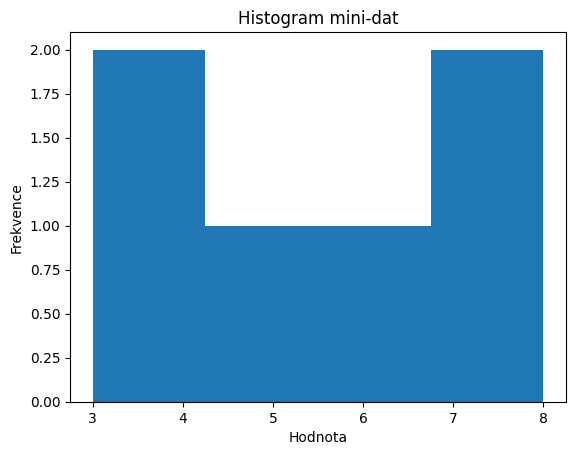

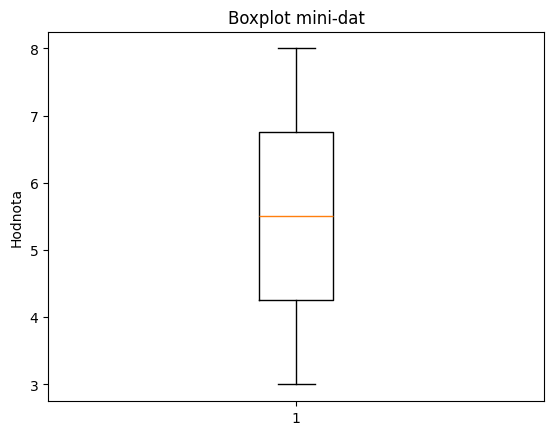

In [3]:
plt.figure()
plt.hist(x, bins='auto')
plt.title('Histogram mini-dat')
plt.xlabel('Hodnota')
plt.ylabel('Frekvence')
plt.show()

plt.figure()
plt.boxplot(x, vert=True)
plt.title('Boxplot mini-dat')
plt.ylabel('Hodnota')
plt.show()

### Vliv odlehlé hodnoty (outlier) – přepočet

In [4]:
x_out = np.array([3, 4, 5, 6, 7, 20], dtype=float)
n2 = x_out.size
mean_o = x_out.mean()
pop_var_o = np.mean((x_out - mean_o)**2)
samp_var_o = np.sum((x_out - mean_o)**2) / (n2 - 1)
pop_std_o = np.sqrt(pop_var_o)
samp_std_o = np.sqrt(samp_var_o)
q1_o, q3_o = np.percentile(x_out, [25, 75])
iqr_o = q3_o - q1_o
mad_o = np.median(np.abs(x_out - np.median(x_out)))

### Grafy s outlierem

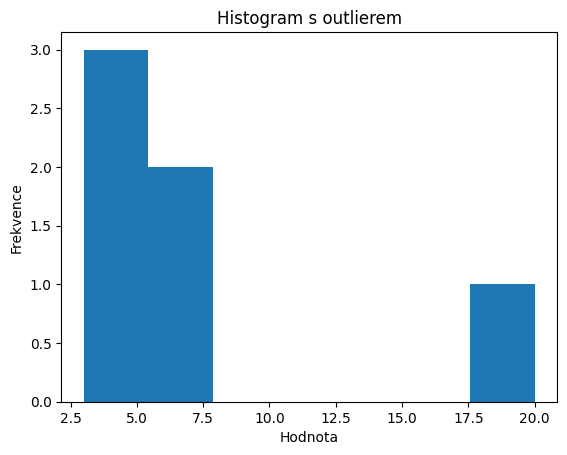

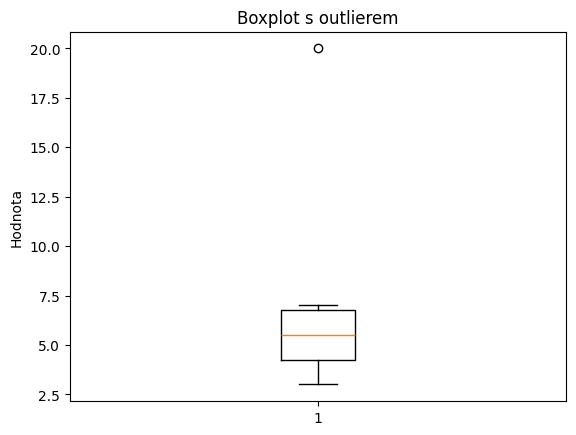

In [5]:
plt.figure()
plt.hist(x_out, bins='auto')
plt.title('Histogram s outlierem')
plt.xlabel('Hodnota')
plt.ylabel('Frekvence')
plt.show()

plt.figure()
plt.boxplot(x_out, vert=True)
plt.title('Boxplot s outlierem')
plt.ylabel('Hodnota')
plt.show()